<a href="https://colab.research.google.com/github/DAEHO0/python/blob/main/230906_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **다층퍼셉트론**

In [1]:
# 파일 불러오기
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Ashopping.csv', encoding = 'cp949')
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [2]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [4]:
Y = df['할인민감여부']

In [5]:
num = ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']
cg = ['구매금액대', '구매유형', '클레임접수여부']

In [6]:
X = df[num + cg]
X

,총매출액,평균 구매주기,방문빈도,총 할인 금액,구매금액대,구매유형,클레임접수여부
0,4963160,149.136364,22,5445,1,3,0
1,2271520,81.342105,38,350995,0,1,0
2,2484250,1817.000000,2,186045,0,2,1
3,2778850,403.111111,9,5195,0,4,0
4,4437610,362.800000,10,246350,1,4,0
...,...,...,...,...,...,...,...
995,12731560,131.257143,35,44445,2,3,1
996,3419010,770.666667,6,186545,0,2,0
997,4612100,355.230769,13,260700,1,1,0
998,5165360,138.535714,28,347700,1,3,0


In [7]:
ct = ColumnTransformer([('scaling', StandardScaler(), num), ('onehot', OneHotEncoder(), cg)])
ct

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']),
                                ('onehot', OneHotEncoder(),
                                 ['구매금액대', '구매유형', '클레임접수여부'])])

In [8]:
ct.fit(X)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']),
                                ('onehot', OneHotEncoder(),
                                 ['구매금액대', '구매유형', '클레임접수여부'])])

In [9]:
X = ct.transform(X)

In [10]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.154022,-0.463652,-0.047765,-2.564558,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.617306,-0.730610,0.791134,0.523977,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.580691,6.104025,-1.096388,-0.950351,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.529985,0.536445,-0.729370,-2.566793,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.244479,0.377708,-0.676939,-0.411343,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.183073,-0.534056,0.633840,-2.215975,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
996,-0.419801,1.983797,-0.886663,-0.945882,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
997,-0.214446,0.347902,-0.519645,-0.283082,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
998,-0.119219,-0.505395,0.266822,0.494526,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [11]:
Y = pd.DataFrame(Y)
Y.describe()

,할인민감여부
count,1000.000000
mean,0.400000
std,0.490143
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


(array([600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 400.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

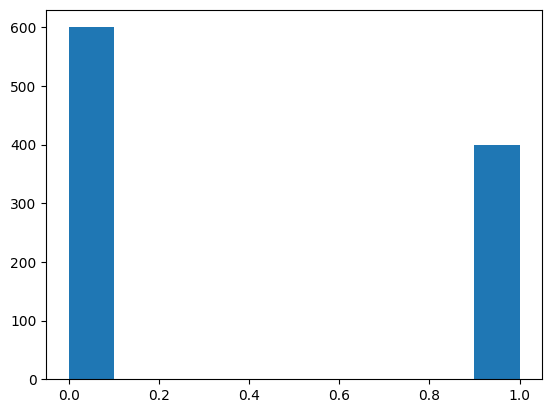

In [12]:
# 히스토그램
import matplotlib.pyplot as plt

plt.hist(Y)

In [13]:
# 트레인 & 테스트 셋 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,-0.013047,-0.013102,0.022418,-0.029651,0.494286,0.311429,0.194286,0.128571,0.372857,0.202857,0.295714,0.671429,0.328571
std,0.949767,0.962267,0.998648,1.015645,0.500325,0.463409,0.395933,0.334964,0.483910,0.402415,0.456689,0.470030,0.470030
min,-0.683645,-0.985771,-1.148819,-2.579708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.521200,-0.617829,-0.637615,-0.285317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.296831,-0.297114,-0.257489,0.487823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.119929,0.251092,0.371685,0.652383,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,10.626287,6.651376,5.352645,0.967348,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
smote = SMOTE(random_state = 0)
# Y를 오버샘플링

In [15]:
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [16]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,0.073450,-0.041953,0.074119,-0.026003,0.464048,0.303518,0.232434,0.124975,0.381796,0.204548,0.288681,0.667217,0.332783
std,1.033382,0.931739,1.020483,1.014612,0.498187,0.458142,0.421521,0.327290,0.481770,0.399408,0.449083,0.468034,0.468034
min,-0.683645,-0.985771,-1.148819,-2.579708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.507094,-0.624790,-0.624508,-0.282524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.259193,-0.309757,-0.205058,0.489163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.221835,0.170861,0.424116,0.648249,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,10.626287,6.651376,5.352645,0.967348,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
Y_train.describe()

,할인민감여부
count,846.000000
mean,0.500000
std,0.500296
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [18]:
# 다층퍼셉트론(Multi Layer Perceptron)
from sklearn.neural_network import MLPClassifier

#mlp_c = MLPClassifier(solver = 'lbfgs', alpha = 0.001, hidden_layer_sizes = [50])
mlp_c = MLPClassifier(solver = 'lbfgs', alpha = 0.001, hidden_layer_sizes = [50, 50])

In [19]:
mlp_c.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.001, hidden_layer_sizes=[50, 50], solver='lbfgs')

In [20]:
Y_pred_mlp = mlp_c.predict(X_test)
Y_pred_mlp

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [21]:
mlp_c.coefs_

[array([[ 3.00913696e+00,  1.34930067e-01,  4.07310968e+00,
         -1.27602967e+00, -6.13848641e-01,  4.40503666e-01,
          3.34312436e+00,  1.36776231e+00,  1.36824584e+00,
         -4.37407428e-02,  1.45405929e+00, -1.96350943e-01,
         -7.18040409e-01,  1.52842764e+00,  4.74233799e-01,
          1.93206653e+00, -1.63200074e+00,  4.76407449e-01,
          2.42566166e+00,  4.83024622e+00, -1.35270078e+00,
          9.50873538e-01,  2.50569207e-01, -1.74413058e-01,
         -1.67476665e+00,  5.93922746e-01,  7.06695223e+00,
          3.87739985e-01,  1.00573937e+00, -1.41529058e+00,
          7.20147908e-01,  3.09027867e+00, -1.76129764e-01,
         -1.64584299e+00,  3.54924238e+00, -1.13808214e+00,
         -1.68741531e+00, -6.45416827e-01,  4.43267032e-01,
          1.11716954e+00, -5.19361648e-02, -2.27325635e-01,
         -9.88469085e-01,  1.38098856e-01, -8.02446194e-01,
          1.13406015e+00, -1.52055159e+00,  2.04813473e-02,
         -7.40542035e-01,  1.32238580e+0

In [22]:
mlp_c.score(X_train, Y_train)

1.0

In [23]:
mlp_c.score(X_test, Y_test)

0.83

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_mlp))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       177
           1       0.81      0.77      0.79       123

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300



### **DNN**

In [25]:
# 경고 무시
import warnings
warnings.filterwarnings("ignore")

In [26]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

np.random.seed(0)
tf.random.set_seed(0)

In [27]:
dnn = keras.models.Sequential()

In [28]:
dnn

In [29]:
X_train.columns

RangeIndex(start=0, stop=13, step=1)

In [30]:
dnn.add(keras.layers.Dense(64, input_dim = 13, activation = 'relu'))

In [31]:
dnn.add(keras.layers.Dense(64, activation = 'relu'))

In [32]:
dnn.add(keras.layers.Dense(1, activation = 'relu'))

In [33]:
dnn.compile(loss='mse', optimizer='SGD')

In [34]:
dnn.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 'auto')

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.3971
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2945
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2505
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2347
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2283
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2234
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2201
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2176
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2131
Epoch 11/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2113
Epoch 12/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2099
Epoch 13/100
14/14 [=================

In [35]:
Y_pred_dnn = dnn.predict(X_test)
Y_pred_dnn

10/10 [==============================] - 0s 2ms/step


array([[0.54421926],
       [0.9556997 ],
       [0.7213235 ],
       [0.510479  ],
       [0.7996967 ],
       [0.90496707],
       [0.21208774],
       [0.42731428],
       [0.44759744],
       [0.5574951 ],
       [0.25142884],
       [0.2842181 ],
       [0.49118105],
       [0.2908303 ],
       [0.9097034 ],
       [0.35866836],
       [0.8815687 ],
       [0.30804804],
       [0.01003078],
       [0.34155774],
       [0.3914207 ],
       [0.5505315 ],
       [0.40666753],
       [0.31618518],
       [0.33526784],
       [0.3691424 ],
       [0.42785504],
       [0.21490741],
       [0.4118778 ],
       [0.34498042],
       [0.6028712 ],
       [0.4574095 ],
       [0.32321852],
       [0.8646163 ],
       [0.8139361 ],
       [0.60842717],
       [0.79109085],
       [0.37578857],
       [1.0273613 ],
       [0.47883785],
       [0.46702138],
       [0.40674013],
       [0.45895186],
       [0.9605913 ],
       [0.43875244],
       [0.14405495],
       [0.2875116 ],
       [0.338

In [36]:
Y_pred_dnn_class = np.round(Y_pred_dnn, 0)
Y_pred_dnn_class
# 0.5보다 크면 1, 작으면 0으로 변환

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [37]:
Y_pred_dnn_class_df = pd.DataFrame(Y_pred_dnn_class)

In [38]:
dnn.evaluate(X_train, Y_train)

27/27 [==============================] - 0s 2ms/step - loss: 0.1738


0.17380954325199127

In [39]:
dnn.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.1819


0.18193696439266205

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_dnn_class_df))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       177
           1       0.76      0.54      0.63       123

    accuracy                           0.74       300
   macro avg       0.75      0.71      0.71       300
weighted avg       0.74      0.74      0.73       300



### **수치예측(회귀모형)**

In [41]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [42]:
Y = df[df.이탈여부 == 0]['1회 평균매출액']

In [43]:
Y.describe()

count    7.000000e+02
mean     2.996386e+05
std      2.377558e+05
min      2.708200e+04
25%      1.577660e+05
50%      2.372125e+05
75%      3.645740e+05
max      2.672915e+06
Name: 1회 평균매출액, dtype: float64

In [44]:
Y = np.log1p(Y)
Y

300    12.497462
301    11.770841
302    12.592046
303    12.545498
304    12.335029
         ...    
995    12.804250
996    13.253104
997    12.779248
998    12.125285
999    12.506888
Name: 1회 평균매출액, Length: 700, dtype: float64

In [45]:
num = ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']
cg = ['구매금액대', '구매유형', '클레임접수여부']

In [46]:
X = df[df.이탈여부 == 0][num + cg]

In [47]:
ct = ColumnTransformer([('scaling', StandardScaler(), num), ('onehot', OneHotEncoder(), cg)])
ct

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']),
                                ('onehot', OneHotEncoder(),
                                 ['구매금액대', '구매유형', '클레임접수여부'])])

In [48]:
ct.fit(X)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']),
                                ('onehot', OneHotEncoder(),
                                 ['구매금액대', '구매유형', '클레임접수여부'])])

In [49]:
X = ct.transform(X)

In [50]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.235245,-0.638484,-0.394069,0.780642,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.630364,-0.448963,-0.394069,0.115720,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.439664,0.557334,-0.693795,0.661568,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2.255074,-0.950654,2.353424,0.577625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.481052,-0.740253,0.754882,0.727789,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.021424,-0.519688,0.455156,-2.200025,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
696,-0.457369,2.998489,-0.993522,-0.937780,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
697,-0.267911,0.712666,-0.643841,-0.279076,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
698,-0.180056,-0.479640,0.105475,0.493727,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,-0.014707,-0.012874,0.012499,-0.004396,0.442857,0.326531,0.230612,0.151020,0.377551,0.185714,0.285714,0.624490,0.375510
std,0.920113,0.968692,1.034478,1.012324,0.497232,0.469423,0.421655,0.358435,0.485270,0.389273,0.452216,0.484749,0.484749
min,-0.696589,-1.164970,-1.193339,-2.557069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.517532,-0.653969,-0.643841,-0.267906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.286414,-0.284002,-0.294160,0.494816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.118362,0.282429,0.305293,0.653840,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,9.733621,7.165510,6.449685,0.890788,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
from sklearn.neural_network import MLPRegressor

mlp_r = MLPRegressor(hidden_layer_sizes = ([50, 50]), activation = 'relu', alpha = 0.001, max_iter = 500)
mlp_r.fit(X_train, Y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=[50, 50], max_iter=500)

In [53]:
Y_pred_mlp_r = mlp_r.predict(X_test)
Y_pred_mlp_r

array([12.50422741, 12.03780055, 11.84911512, 13.62998394, 11.50690286,
       12.2112407 , 11.58318173, 12.1546077 , 11.89118577, 12.18259069,
       12.48769136, 14.25218824, 12.20252578, 12.09904684, 12.85612745,
       12.34197713, 12.4923861 , 12.24490861, 11.9932838 , 12.34016721,
       12.62507897, 11.52949531, 12.81879338, 12.28850304, 10.18391532,
       12.94504293, 12.53366722, 12.42469756, 11.45139959, 11.92437713,
       12.52318369, 12.61681556, 12.99079847, 13.46679735, 12.02278179,
       11.98106582, 12.40740539, 13.02645974, 11.96546239, 14.36217095,
       12.90575962, 12.152707  , 13.28326062, 12.38426769, 12.00155475,
       12.71720258, 10.70708086, 12.0237897 , 12.76489521, 12.44459996,
       11.71926213, 13.30876996, 10.451411  , 13.24992541, 12.55615088,
       12.36174084, 12.65300359, 12.48148336, 12.87738872, 12.17072091,
       12.66766939, 13.30093917, 11.84336731, 12.31608001, 11.96614787,
       11.99018725, 11.79832027, 11.63547075, 12.82079336, 12.82

In [54]:
mlp_r.score(X_train, Y_train)

0.9344401215614996

In [55]:
mlp_r.score(X_test, Y_test)

0.8310396470079003

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(Y_pred_mlp_r, Y_test)
mse

0.07119118470241861

In [57]:
print('rmse:', sqrt(mse))

rmse: 0.266816762408996


### **앙상블**

In [58]:
from sklearn.svm import SVR
svm = SVR()
svm

SVR()

In [59]:
mlp_r

MLPRegressor(alpha=0.001, hidden_layer_sizes=[50, 50], max_iter=500)

In [60]:
from sklearn.ensemble import VotingRegressor

In [61]:
ensem_svm_mlp = VotingRegressor(estimators = [('SVR', svm),('MLP', mlp_r)])

In [62]:
ensem_svm_mlp

VotingRegressor(estimators=[('SVR', SVR()),
                            ('MLP',
                             MLPRegressor(alpha=0.001,
                                          hidden_layer_sizes=[50, 50],
                                          max_iter=500))])

In [63]:
ensem_svm_mlp.fit(X_train, Y_train)

VotingRegressor(estimators=[('SVR', SVR()),
                            ('MLP',
                             MLPRegressor(alpha=0.001,
                                          hidden_layer_sizes=[50, 50],
                                          max_iter=500))])

In [64]:
ensem_svm_mlp.score(X_train, Y_train)

0.9634377831128548

In [65]:
ensem_svm_mlp.score(X_test, Y_test)

0.9512591512082984

In [67]:
Y_pred_ensem = ensem_svm_mlp.predict(X_test)

In [69]:
mse = mean_squared_error(Y_pred_ensem, Y_test)
mse

0.02053688162598081

In [70]:
print('rmse:', sqrt(mse))

rmse: 0.14330694898008542


In [71]:
Y_pred_ensem = pd.DataFrame(Y_pred_ensem)
Y_pred_ensem

,0
0,12.583511
1,12.003836
2,12.122013
3,13.914728
4,11.427874
...,...
205,11.663910
206,12.374195
207,12.371993
208,12.807569
